<h2>**Problem Definition**</h2>
<p><i>
As the world suffers from Coronovirus outbreak, we want to understand the trend  on the outbreak across all countries and see the response rate across all countries. We can check for any trends, data analysis and then try ML model to predict if we can expect the highest peaks across all the countries based on John hopkins data </i> 

<b> TARGET : Study the pattern of Coronavirus to understand which countries took effective step and what can we learn from the patterns. Our focus is USA, Spain, Italy, China and South Korea </b>

In [0]:
!pip install bubbly
!pip install pandas-profiling
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# for some cool Stats
import statsmodels.api as sm 
from statsmodels.api import add_constant

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot
import plotly.express as px

In [0]:
# mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# reading data driectly from John Hopkins github
confirmed_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv')

In [167]:
confirmed_global_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7


In [0]:
# Adding confirmed cases, deaths and recoveries 
cols = confirmed_global_df.keys()
confirmed = confirmed_global_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_global_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_global_df.loc[:, cols[4]:cols[-1]]



dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
south_korea_cases = []
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    south_korea_cases.append(confirmed_global_df[confirmed_global_df['Country/Region']=='Korea, South'][i].sum())
    china_cases.append(confirmed_global_df[confirmed_global_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_global_df[confirmed_global_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_global_df[confirmed_global_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_global_df[confirmed_global_df['Country/Region']=='Spain'][i].sum())

In [0]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
south_korea_daily_increase =daily_increase(south_korea_cases)
spain_daily_increase = daily_increase(spain_cases)

In [0]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [0]:
# Lets say we want to predict 7 days in future and check if we can get better predictions
days_in_future = 7
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-7]

In [0]:
#Convert integer into datetime for better visualization
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 
start = '1/1/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

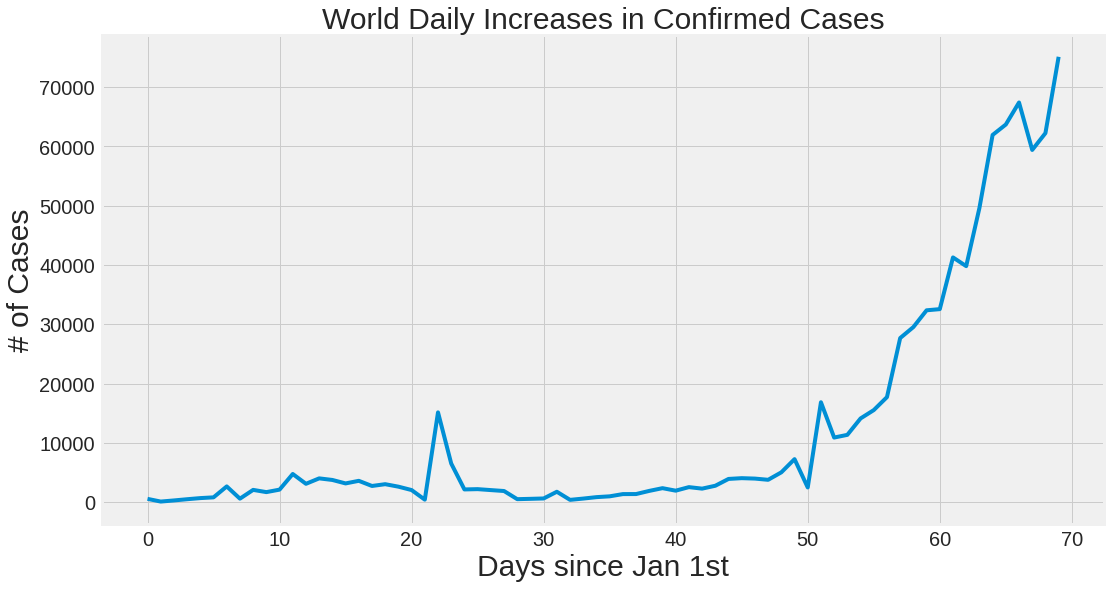

In [178]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

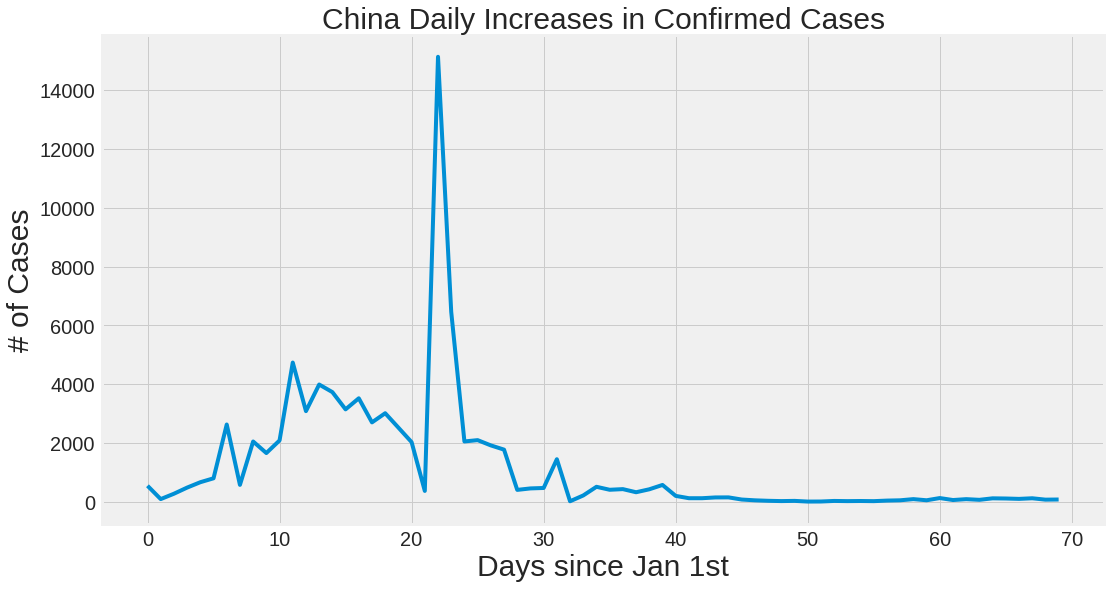

In [179]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

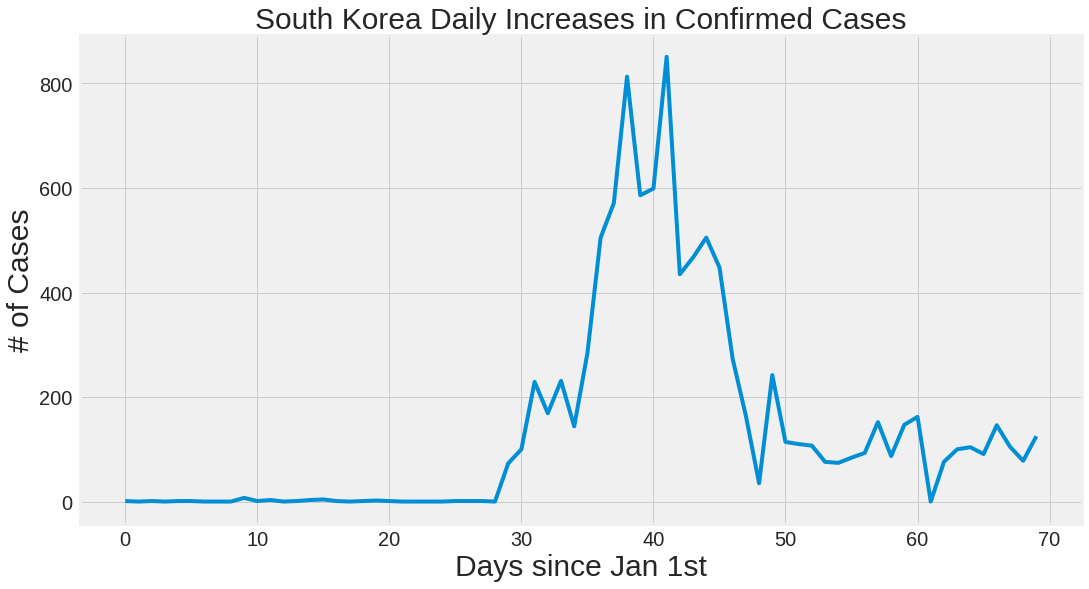

In [180]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, south_korea_daily_increase)
plt.title('South Korea Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

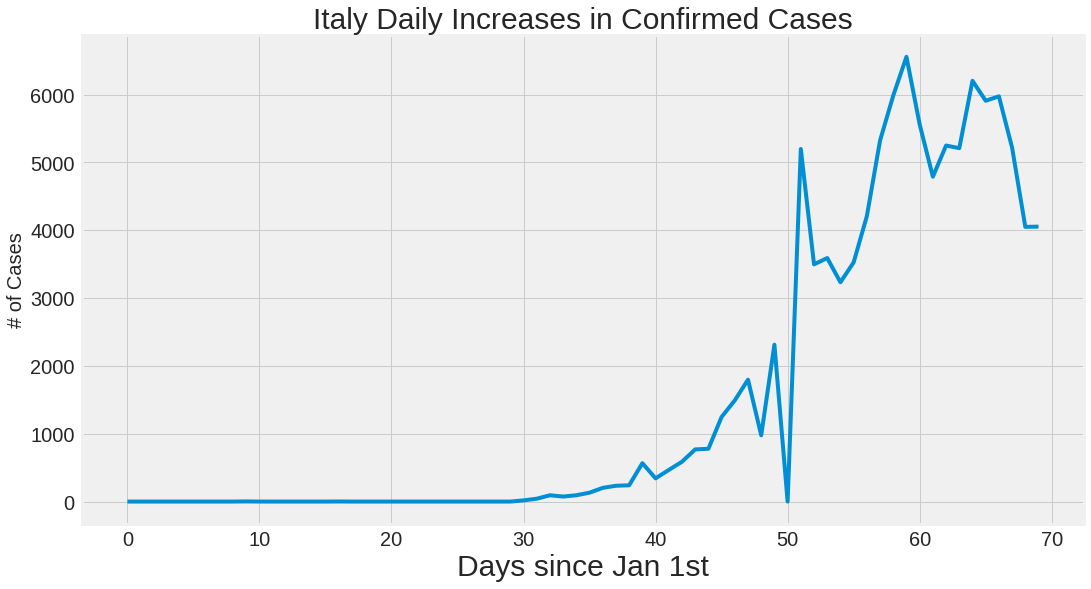

In [181]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

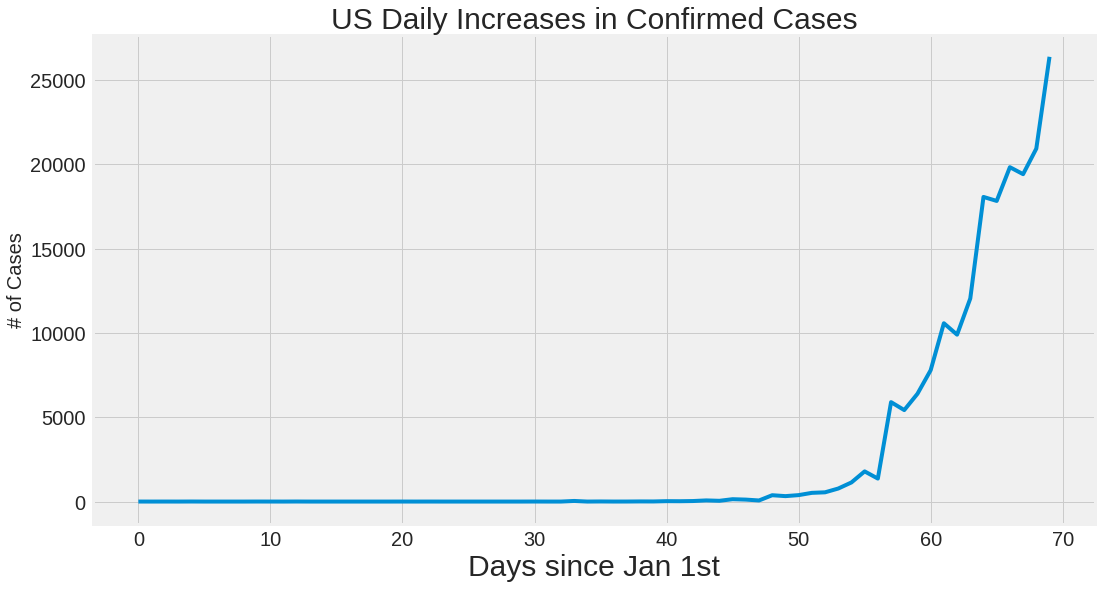

In [182]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

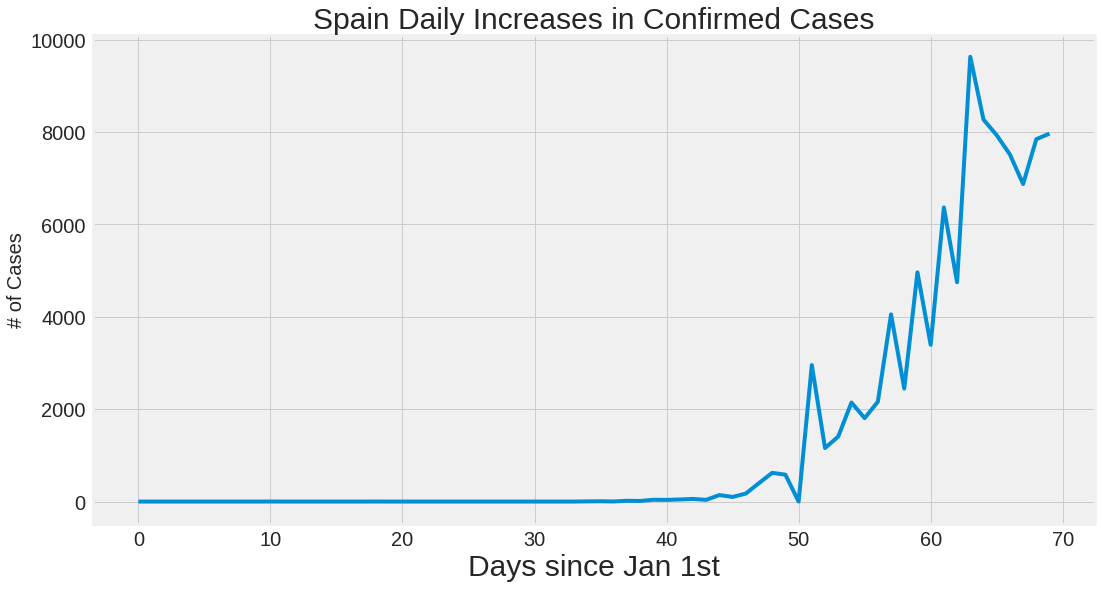

In [183]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, spain_daily_increase)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days since Jan 1st', size=30)
plt.ylabel('# of Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

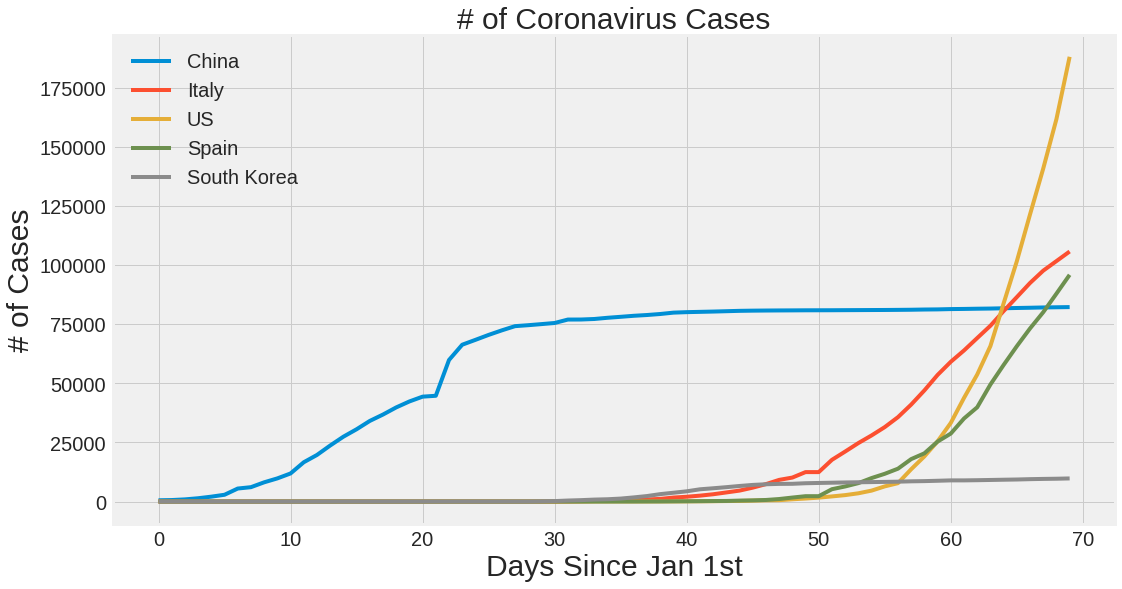

In [184]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, spain_cases)
plt.plot(adjusted_dates, south_korea_cases)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since Jan 1st', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Spain','South Korea'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

<h2> USA ; With the current highest number of cases - We will check states with highest number of cases and find any trend across states</h2>

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


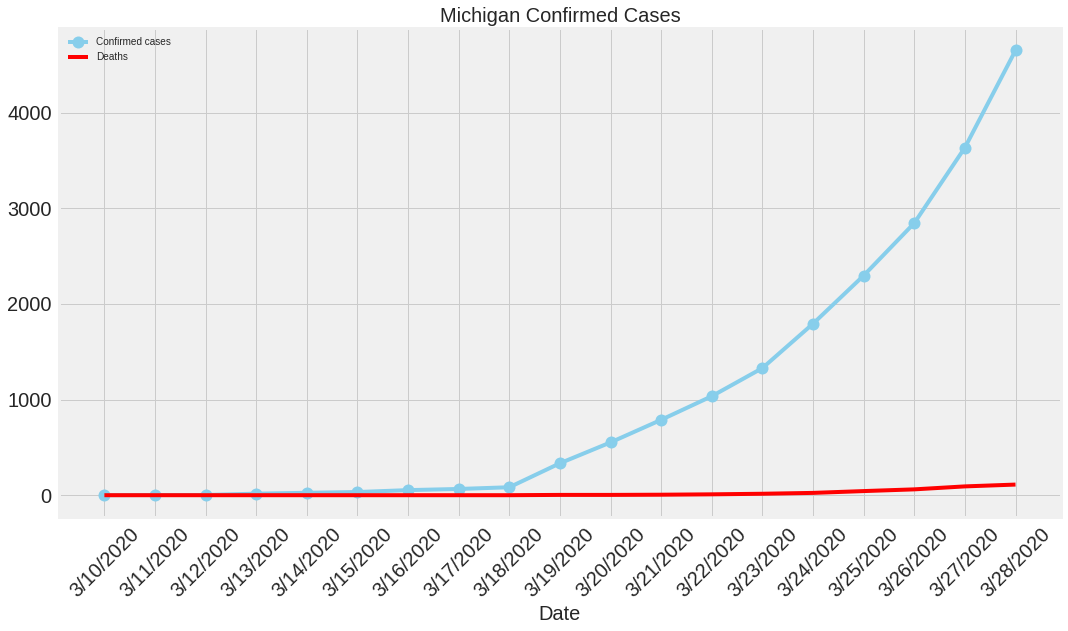

In [185]:
latest_global_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-29-2020.csv')
data_us = latest_global_df.loc[latest_global_df['Country_Region'] =='US']
data_us.head(5)
Michigan_breakdown_data_df = data_us[data_us['Province_State']=='Michigan']
path= "/content/drive/My Drive/python_for_data_scientists/Colab Notebooks/covid_19_data_US_Statewise_datetime.csv"
data_us = pd.read_csv(path)
Michigan_breakdown_data_df = data_us[data_us['Province/State']=='Michigan']

x_date = Michigan_breakdown_data_df['ObservationDate']
y1_confirmed =Michigan_breakdown_data_df['Confirmed']
y2_death = Michigan_breakdown_data_df['Deaths']


plt.figure(figsize=(16, 9))
plt.title('Michigan Confirmed Cases', size=20)
plt.plot(x_date,y1_confirmed,marker = 'o',markersize=12, color='skyblue',linewidth=4,label = 'Confirmed cases')
plt.plot(x_date,y2_death,marker='x',markersize=12, color='red', linewidth=4, label="Deaths")
plt.xlabel('Date', size=20)
plt.xticks(rotation=45,size = 20)
plt.yticks(size=20)
plt.legend()
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


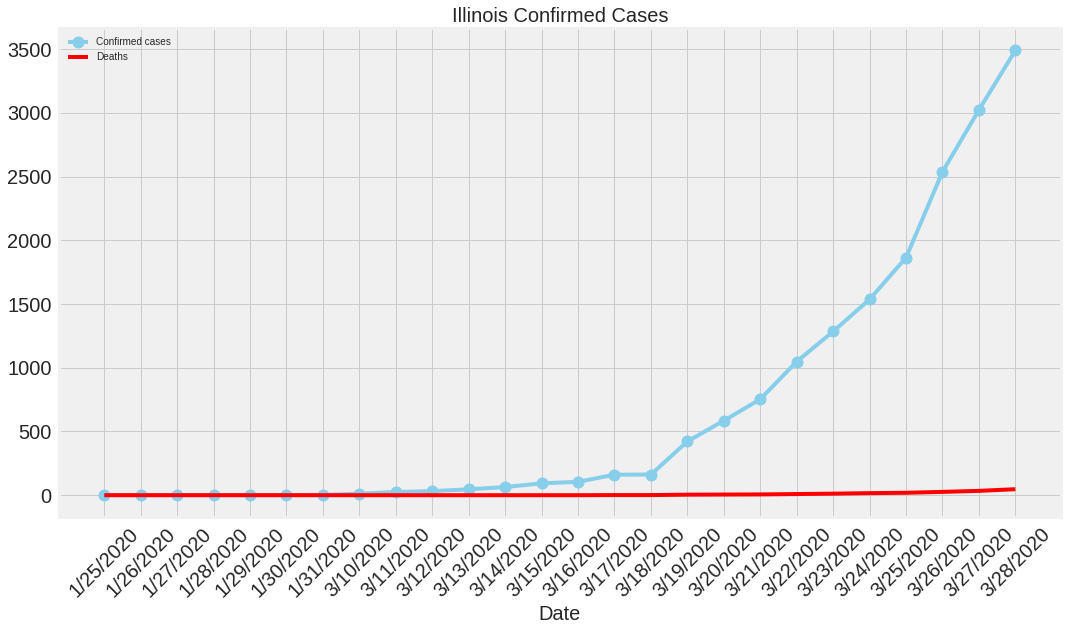

In [186]:
Illinois_breakdown_data_df = data_us[data_us['Province/State']=='Illinois']

x_date = Illinois_breakdown_data_df['ObservationDate']
y1_confirmed =Illinois_breakdown_data_df['Confirmed']
y2_death = Illinois_breakdown_data_df['Deaths']


plt.figure(figsize=(16, 9))
plt.title('Illinois Confirmed Cases', size=20)
plt.plot(x_date,y1_confirmed,marker = 'o',markersize=12, color='skyblue',linewidth=4,label = 'Confirmed cases')
plt.plot(x_date,y2_death,marker='x',markersize=12, color='red', linewidth=4, label="Deaths")
plt.xlabel('Date', size=20)
plt.xticks(rotation=45,size = 20)
plt.yticks(size=20)
plt.legend()
plt.show()


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


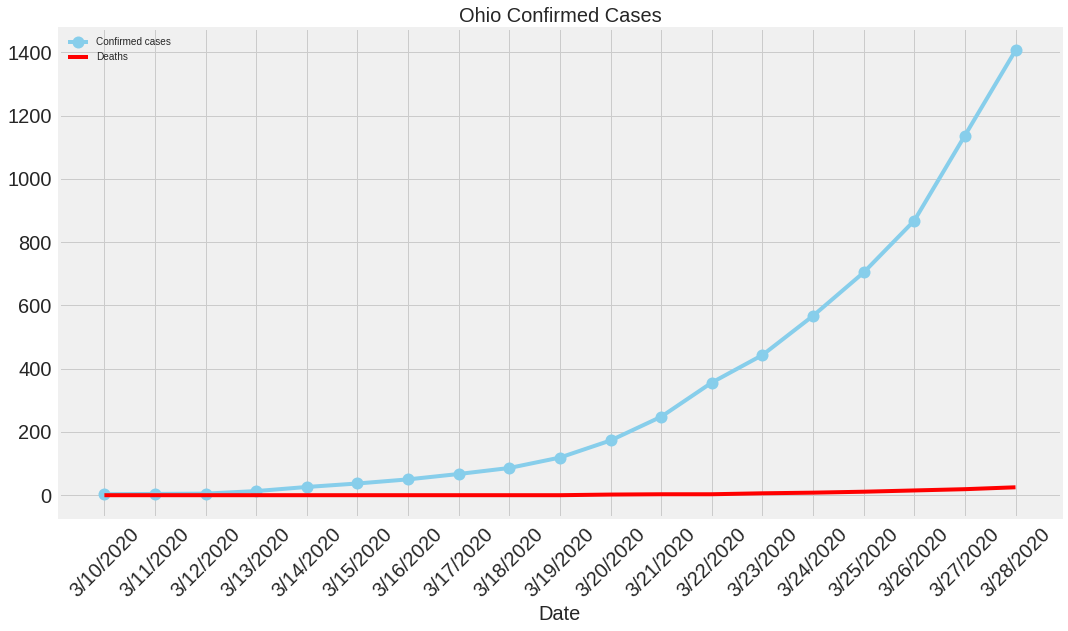

In [187]:
Ohio_breakdown_data_df = data_us[data_us['Province/State']=='Ohio']

x_date = Ohio_breakdown_data_df['ObservationDate']
y1_confirmed =Ohio_breakdown_data_df['Confirmed']
y2_death = Ohio_breakdown_data_df['Deaths']


plt.figure(figsize=(16, 9))
plt.title('Ohio Confirmed Cases', size=20)
plt.plot(x_date,y1_confirmed,marker = 'o',markersize=12, color='skyblue',linewidth=4,label = 'Confirmed cases')
plt.plot(x_date,y2_death,marker='x',markersize=12, color='red', linewidth=4, label="Deaths")
plt.xlabel('Date', size=20)
plt.xticks(rotation=45,size = 20)
plt.yticks(size=20)
plt.legend()
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


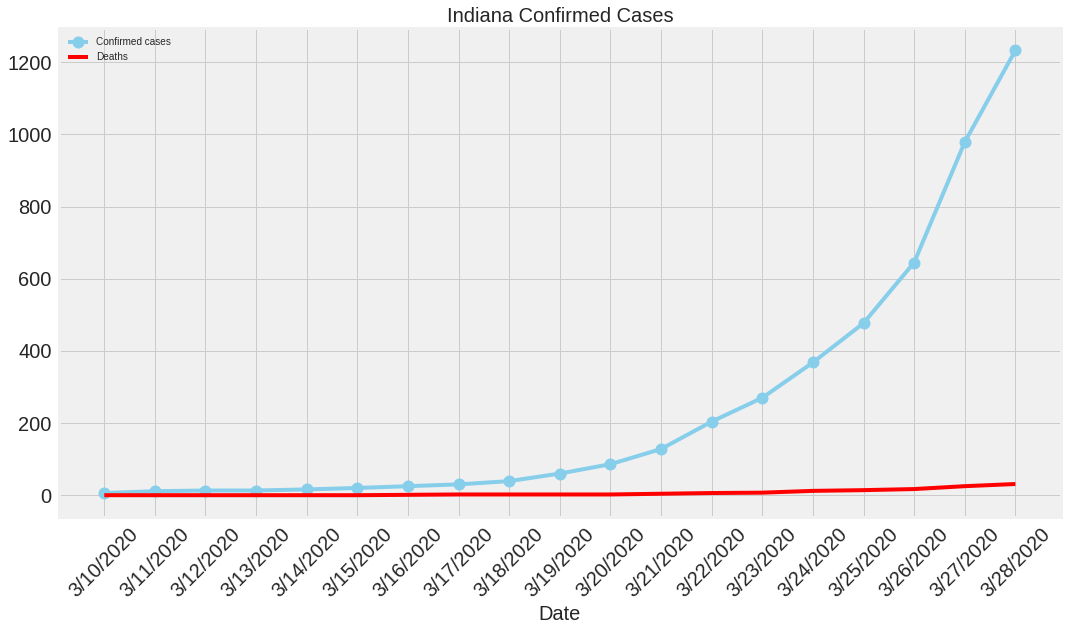

In [188]:
Indiana_breakdown_data_df = data_us[data_us['Province/State']=='Indiana']

x_date = Indiana_breakdown_data_df['ObservationDate']
y1_confirmed =Indiana_breakdown_data_df['Confirmed']
y2_death = Indiana_breakdown_data_df['Deaths']


plt.figure(figsize=(16, 9))
plt.title('Indiana Confirmed Cases', size=20)
plt.plot(x_date,y1_confirmed,marker = 'o',markersize=12, color='skyblue',linewidth=4,label = 'Confirmed cases')
plt.plot(x_date,y2_death,marker='x',markersize=12, color='red', linewidth=4, label="Deaths")
plt.xlabel('Date', size=20)
plt.xticks(rotation=45,size = 20)
plt.yticks(size=20)
plt.legend()
plt.show()

<h1> On inspecting several states in USA, we can check an exponential growth on top 5 states.  We can keep analysing more as on-going project </h1>

<h1> Let us use data from Italy as we have more historical data across regions, demographic data across patients and better understanding of features from many databases </h1>

In [0]:
# import  data

path= "/content/drive/My Drive/python_for_data_scientists/Colab Notebooks/covid19_italy_region.csv"
data = pd.read_csv(path)

In [0]:

path = "/content/drive/My Drive/python_for_data_scientists/Colab Notebooks/COVID19_open_line_list.csv"
an_data = pd.read_csv(path)


**ITALY ** : Detail analysis on Italy as we have good data to forecast the peak of cases seen in Italy

In [0]:

path = "/content/drive/My Drive/python_for_data_scientists/Colab Notebooks/COVID-19-3.27-top30-500.xlsx"
comp = pd.read_excel(path)

In [0]:
path = "/content/drive/My Drive/python_for_data_scientists/Colab Notebooks/covid19_italy_province.csv"
province = pd.read_csv(path)

In [194]:
an_data = an_data[an_data['country']=='Italy']
an_data.shape

(588, 45)

[(0.0, 133.1891721424099)]

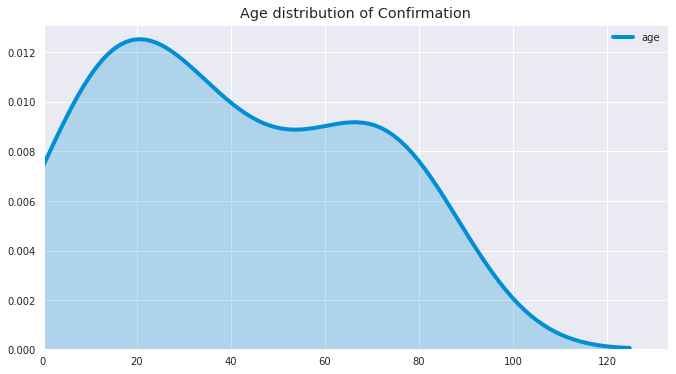

In [195]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmation")
sns.kdeplot(data=an_data['age'], shade=True).set(xlim=(0))

The age range of 40-50 years have more infection rate for men
The age range of 50-70 years have more infection rate for men. 

[(0.0, 163.9277045948024)]

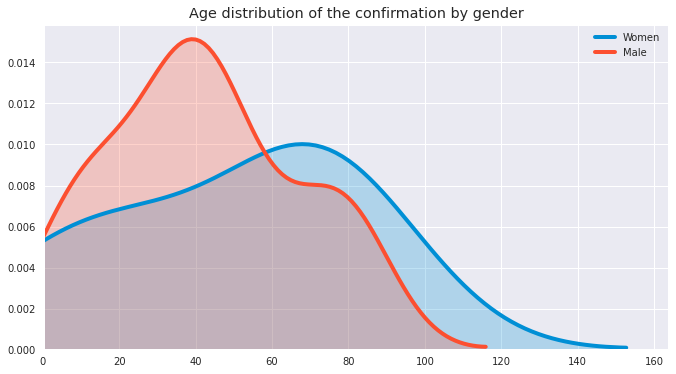

In [196]:
male_dead = an_data[an_data.sex=='male']
female_dead = an_data[an_data.sex=='female']
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the confirmation by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True).set(xlim=(0))
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True).set(xlim=(0))

In [199]:
import folium
corona_affected_areas_map = folium.Map(location=[42.8719,12.5674 ], zoom_start=6,tiles='Stamen Terrain')

for lat, lon,RegionName,TotalPositiveCases,Recovered,Deaths,TotalHospitalizedPatients in zip(data['Latitude'], data['Longitude'],data['RegionName'],data['TotalPositiveCases'],data['Recovered'],data['Deaths'],data['TotalHospitalizedPatients']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        color='red',
                      popup =('RegionName: ' + str(RegionName) + '<br>'
                    'TotalPositiveCases: ' + str(TotalPositiveCases) + '<br>'
                    'TotalHospitalizedPatients: ' + str(TotalHospitalizedPatients) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(corona_affected_areas_map)
corona_affected_areas_map

We can now see which areas are affected mostly by the virus - we can start foreacsting the peak of the cases using forecasting APIs

Grouping Data According to Region Name

In [0]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
daily = data.sort_values(['Date','Country','RegionName'])
latest = data[data.Date == daily.Date.max()]
latest.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 63


,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
735,735,2020-03-30,ITA,13,Abruzzo,42.351222,13.398438,322,69,391,778,1169,0,74,102,1345,7948
736,736,2020-03-30,ITA,17,Basilicata,40.639471,15.805148,36,18,54,154,208,11,1,5,214,1833
737,737,2020-03-30,ITA,4,P.A. Bolzano,46.499335,11.356624,231,62,293,805,1098,64,153,74,1325,10640
738,738,2020-03-30,ITA,18,Calabria,38.905976,16.594402,130,18,148,454,602,25,14,31,647,9013
739,739,2020-03-30,ITA,15,Campania,40.839566,14.250850,468,126,594,1145,1739,183,88,125,1952,12969


In [0]:
data_groupby_region = latest.groupby("RegionName")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgr = data_groupby_region 
dgr.head()

,RegionName,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,Abruzzo,1345,102,74,7948,322,391
1,Basilicata,214,5,1,1833,36,54
2,Calabria,647,31,14,9013,130,148
3,Campania,1952,125,88,12969,468,594
4,Emilia Romagna,13531,1538,1227,50990,3779,4130


In [0]:
dgrs_el = dgr.sort_values(by=['TotalPositiveCases'],ascending = False)
dgrs_el.head()

,RegionName,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
8,Lombardia,42161,6818,10337,111057,11815,13145
4,Emilia Romagna,13531,1538,1227,50990,3779,4130
20,Veneto,8724,413,747,99941,1633,1989
13,Piemonte,8712,749,308,25478,2985,3437
17,Toscana,4412,231,131,30099,1116,1395


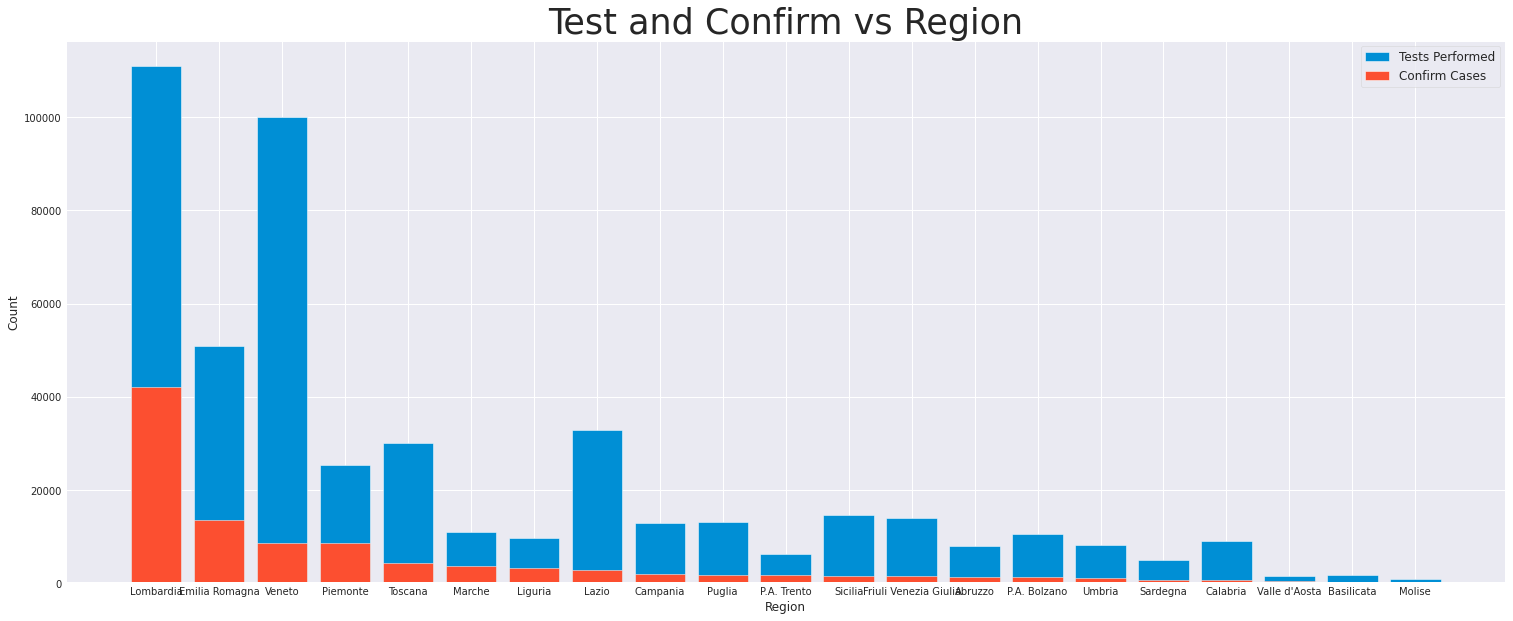

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TestsPerformed,label="Tests Performed")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test and Confirm vs Region',fontsize = 35)

plt.show()


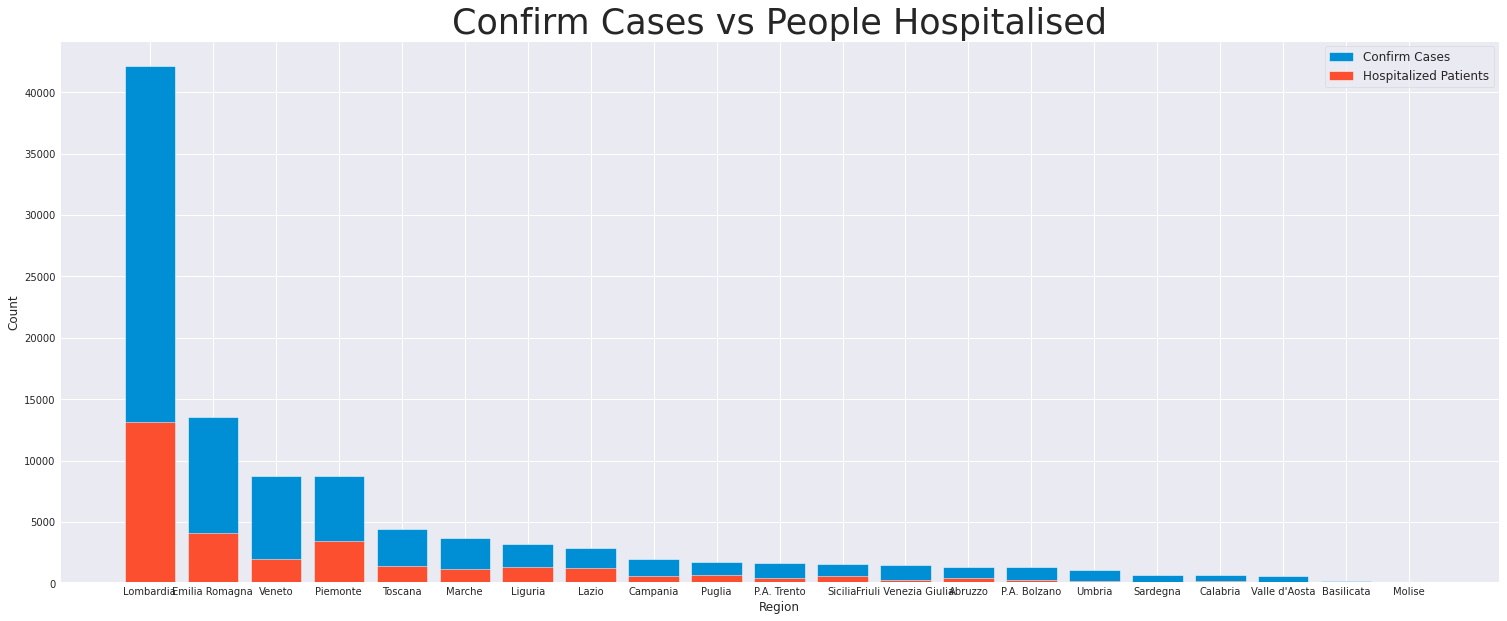

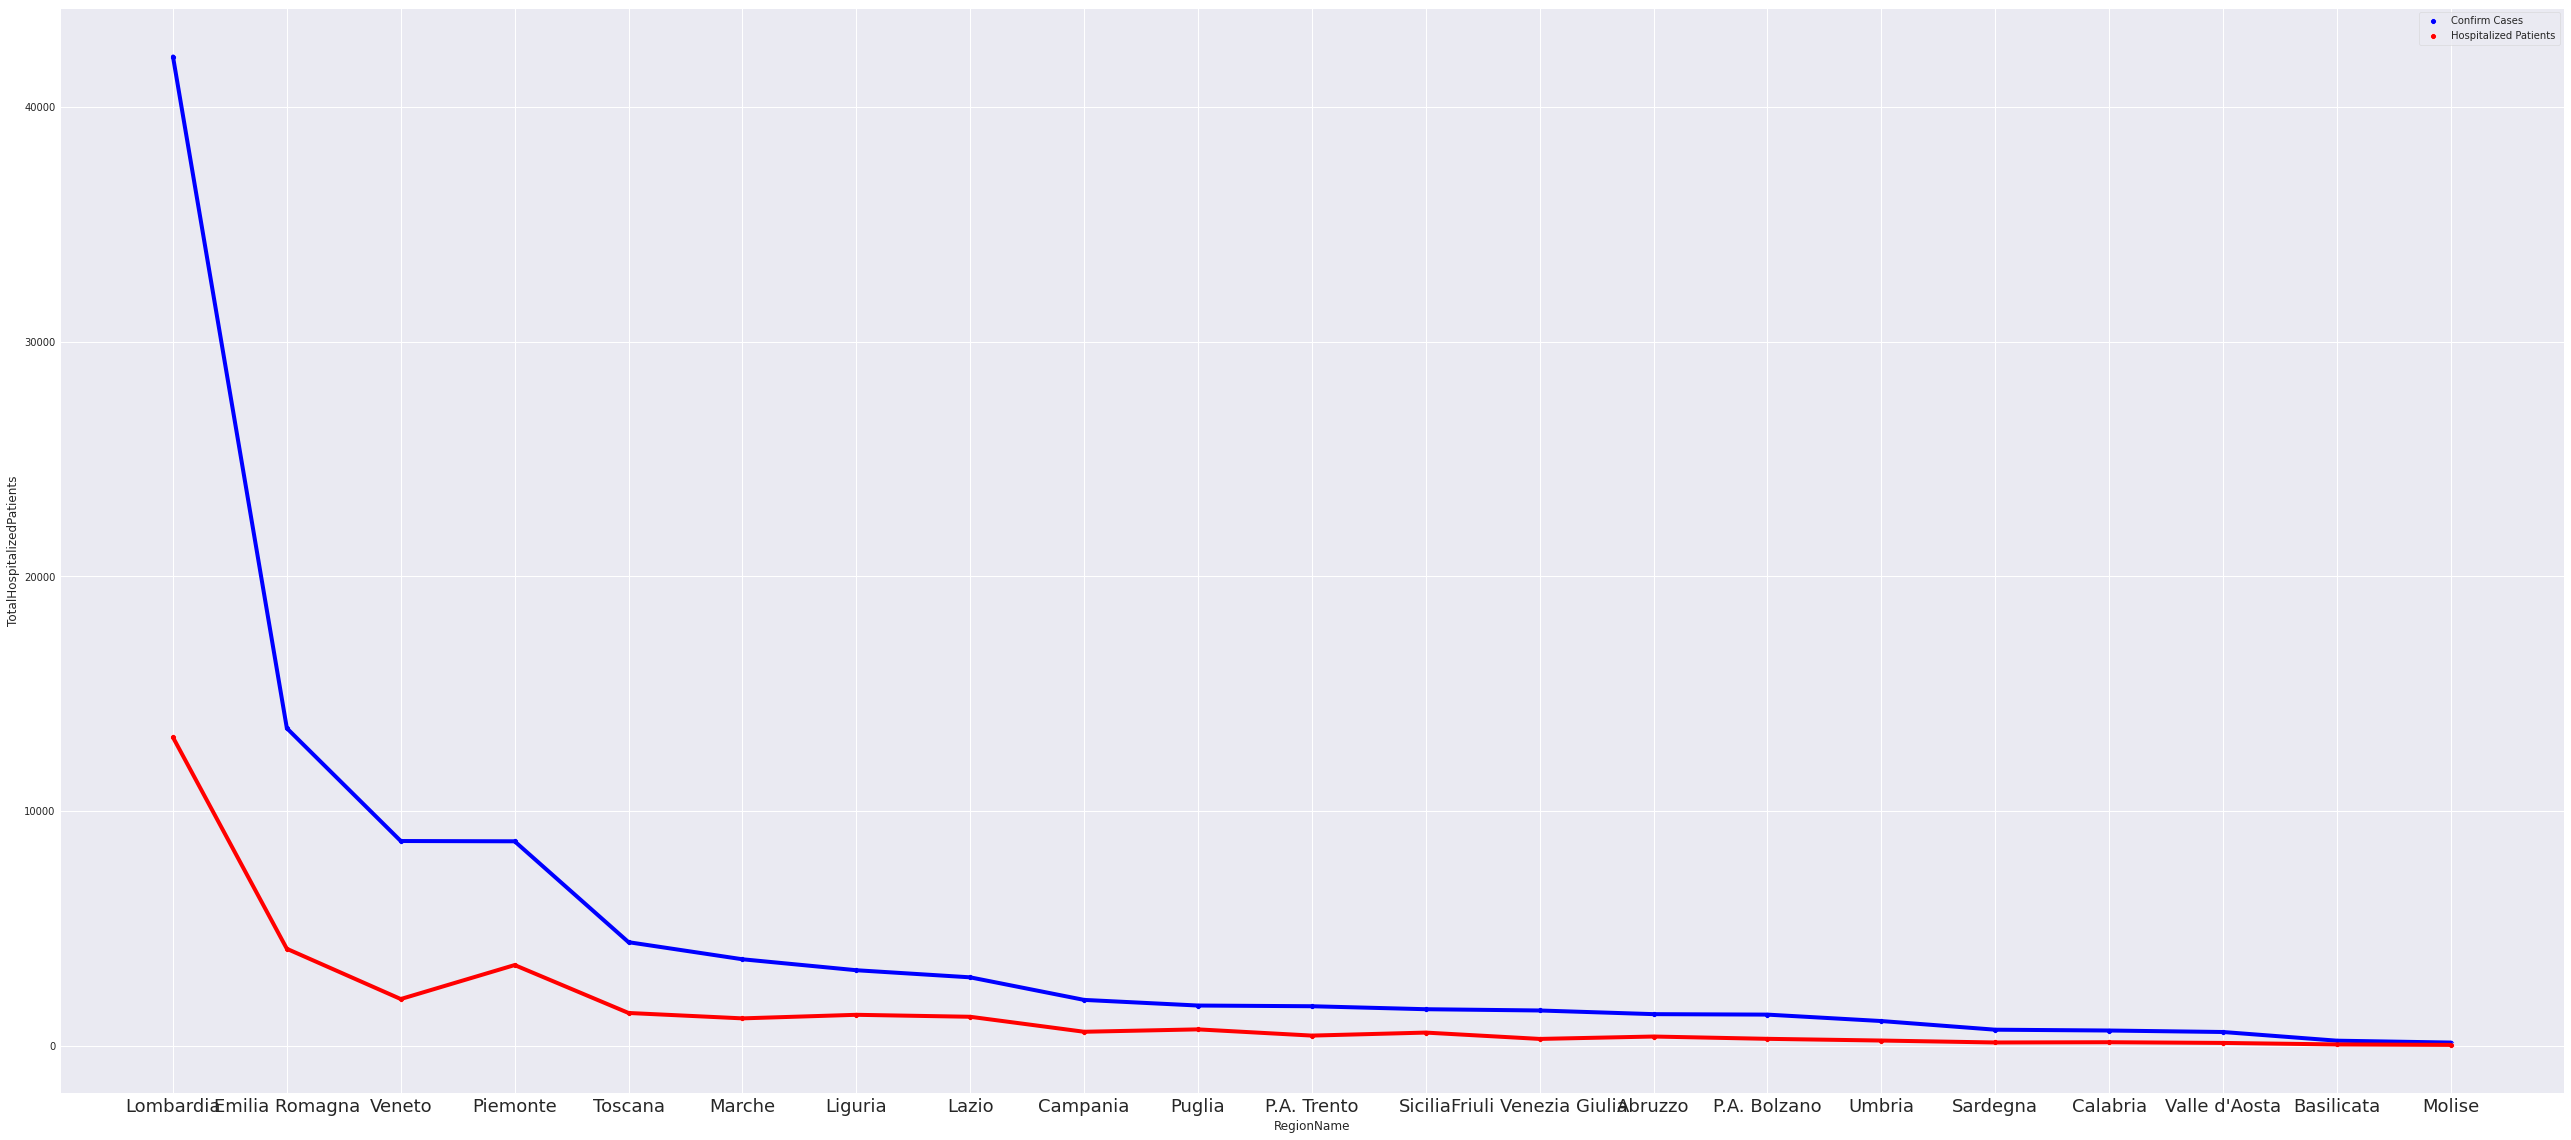

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalHospitalizedPatients,label="Hospitalized Patients")

plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm Cases vs People Hospitalised',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(40,20))

ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax=sns.scatterplot(x="RegionName", y="TotalHospitalizedPatients", data=dgrs_el,
             color="red",label = "Hospitalized Patients")
ax.xaxis.set_tick_params(labelsize=18)
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalHospitalizedPatients,zorder=1,color="red")

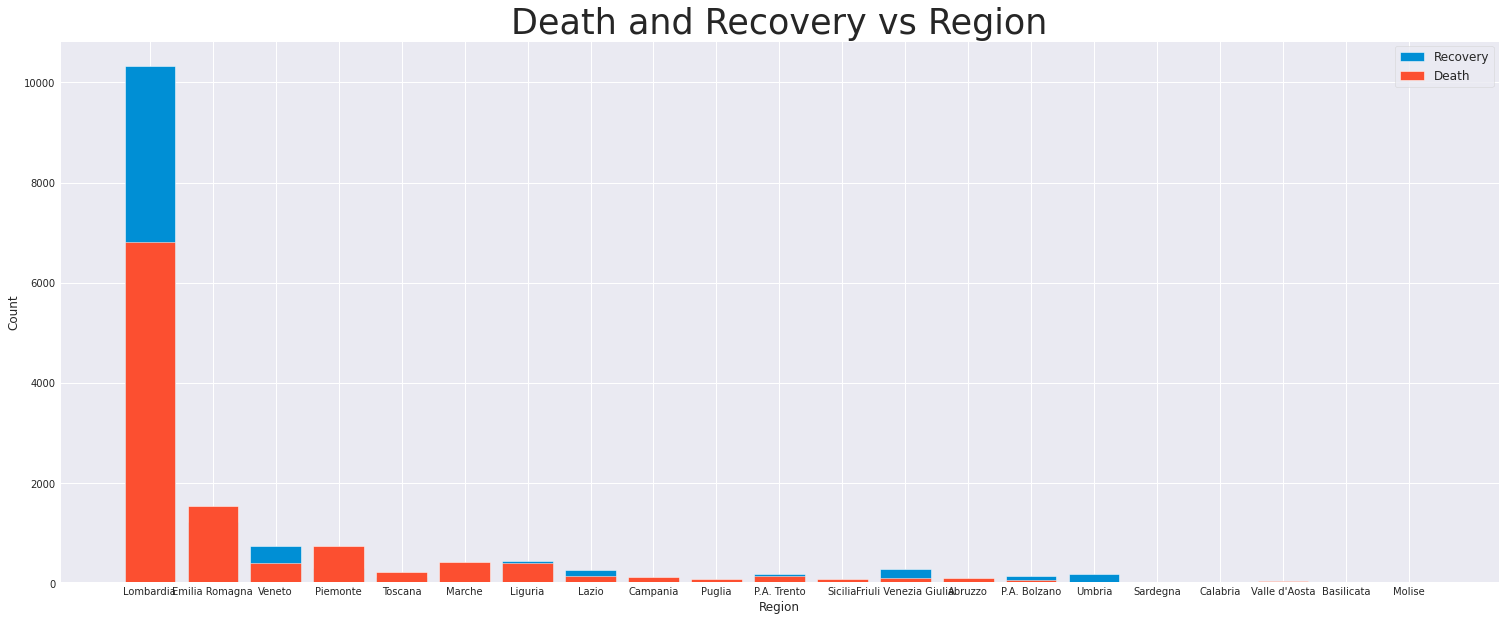

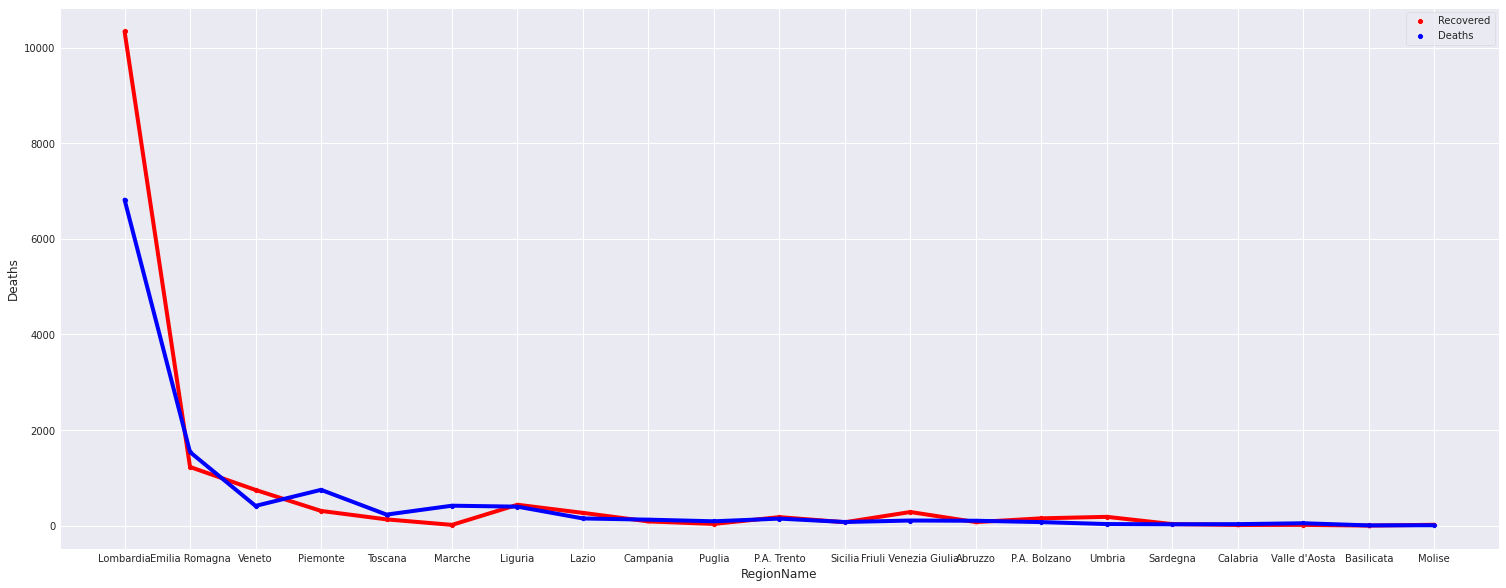

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.Recovered,label="Recovery")
plt.bar(dgrs_el.RegionName, dgrs_el.Deaths,label="Death")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death and Recovery vs Region', fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="RegionName", y="Recovered", data=dgrs_el,
             color="red",label = "Recovered")
ax=sns.scatterplot(x="RegionName", y="Deaths", data=dgrs_el,
             color="blue",label = "Deaths")
plt.plot(dgrs_el.RegionName,dgrs_el.Recovered,zorder=1,color="red")
plt.plot(dgrs_el.RegionName,dgrs_el.Deaths,zorder=1,color="blue")

In [0]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
latest = data[data.Date == daily.Date.max()]
temp = latest.loc[:,['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']]
temp.head()

,Date,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,Recovered,Deaths,TotalPositiveCases,TestsPerformed
735,2020-03-30,322,69,391,778,74,102,1345,7948
736,2020-03-30,36,18,54,154,1,5,214,1833
737,2020-03-30,231,62,293,805,153,74,1325,10640
738,2020-03-30,130,18,148,454,14,31,647,9013
739,2020-03-30,468,126,594,1145,88,125,1952,12969


In [0]:
data_groupby_date = latest.groupby("Date")[['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']].sum().reset_index()
data_groupby_date
ps_ts = float(data_groupby_date.TotalPositiveCases/data_groupby_date.TestsPerformed)
d_ts = float(data_groupby_date.Deaths/data_groupby_date.TestsPerformed)
r_ps = float(data_groupby_date.Recovered/data_groupby_date.TotalPositiveCases)
d_ps = float(data_groupby_date.Deaths/data_groupby_date.TotalPositiveCases)

In [0]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd3 = data_groupby_date1
dgd3.head()
dgd2 = dgd3

In [0]:
dgd2["Date"]= dgd3["Date"].dt.strftime("%d-%m-%y") 
dgd2.head()

,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,24-02-20,229,7,1,4324,101,127
1,25-02-20,322,10,1,8623,114,150
2,26-02-20,400,12,3,9587,128,164
3,27-02-20,650,17,45,12014,248,304
4,28-02-20,888,21,46,15695,345,409


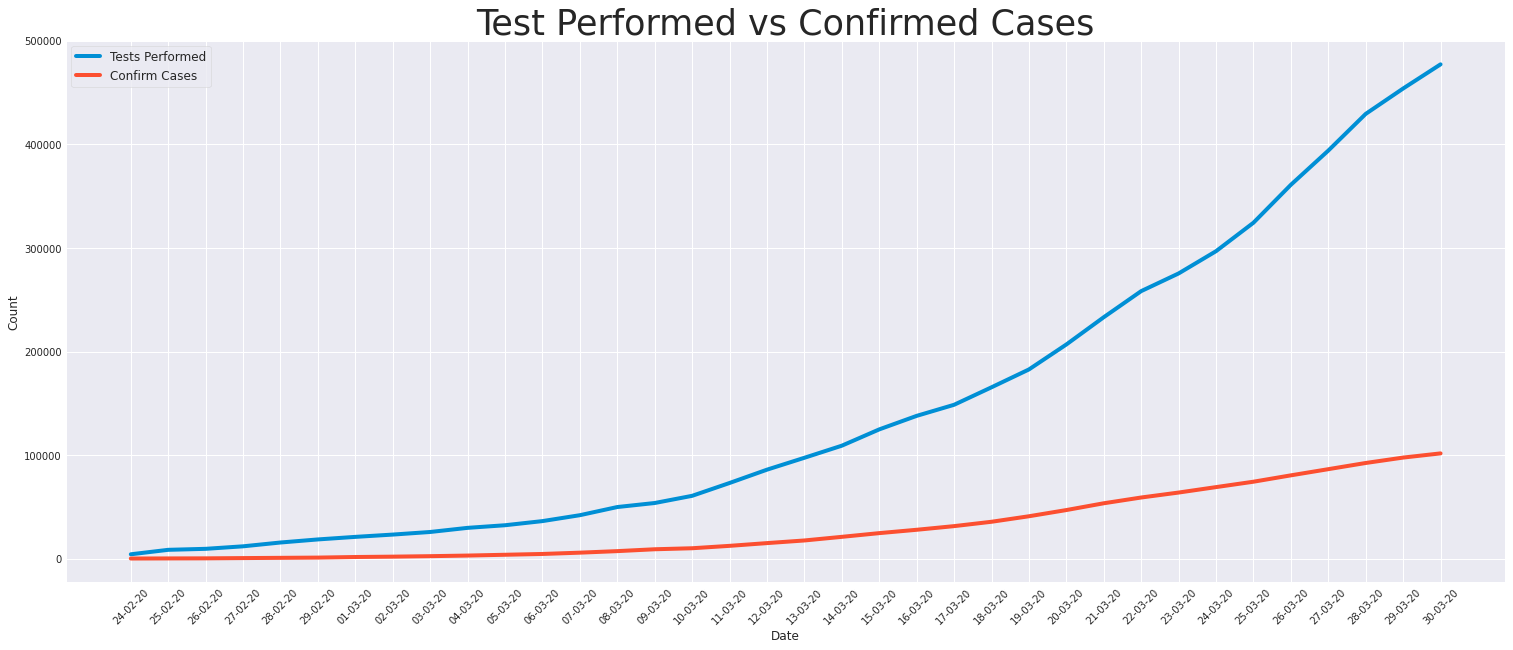

In [0]:
plt.figure(figsize=(23,10))
plt.plot(dgd2.Date, dgd2.TestsPerformed,label="Tests Performed")
plt.plot(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test Performed vs Confirmed Cases',fontsize = 35)
plt.xticks(rotation = 45)
plt.show()

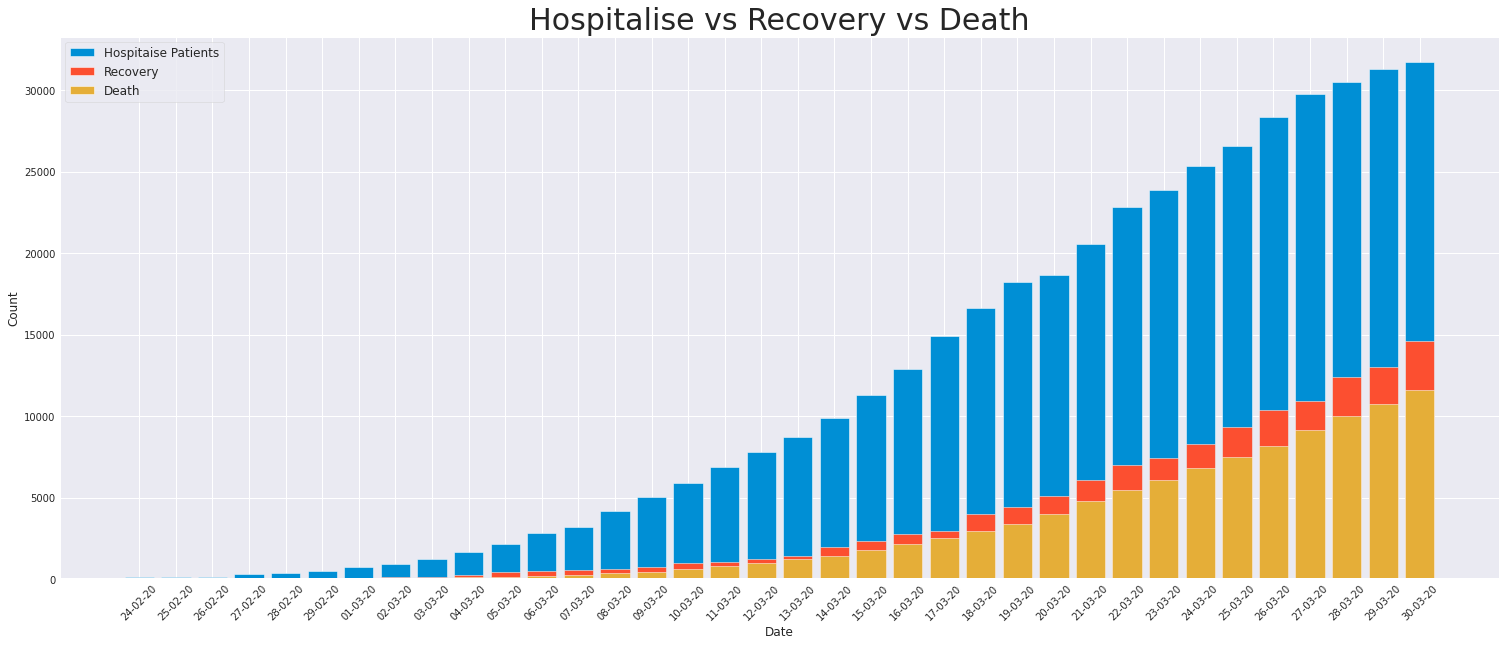

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitaise Patients")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Hospitalise vs Recovery vs Death',fontsize=30)
plt.show()

In [0]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd1 = data_groupby_date1
dgd1.head()
pr_data_test = dgd1.loc[:,['Date','TestsPerformed']]
pr_data_test.columns = ['ds','y']
pr_data_test.head()

,ds,y
0,2020-02-24,4324
1,2020-02-25,8623
2,2020-02-26,9587
3,2020-02-27,12014
4,2020-02-28,15695


<h1> Forecasting the peak for registered cases in Italy </h1>
<h3>Forecast is scientific and free from intuition and personal bias, whereas prediction is subjective and fatalistic in nature. Forecasting is an extrapolation of past into the future while prediction is judgmental and takes into account changes taking place in the future.</h3>

In [0]:
# Forecasting using Prophet API foreactsing (https://facebook.github.io/prophet/)
# Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 
#It works best with time series that have strong seasonal effects and several seasons of historical data. 
#Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot


m = Prophet()
m.fit(pr_data_test)
future=m.make_future_dataframe(periods=15)
forecast_test=m.predict(future)
forecast_test
test = forecast_test.loc[:,['ds','trend']]
test = test[test['trend']>0]
test.head()
test=test.tail(15)
test.columns = ['Date','Screening']
test.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,Date,Screening
36,2020-03-31,506411.250847
37,2020-04-01,535052.649221
38,2020-04-02,563694.047595
39,2020-04-03,592335.445969
40,2020-04-04,620976.844343


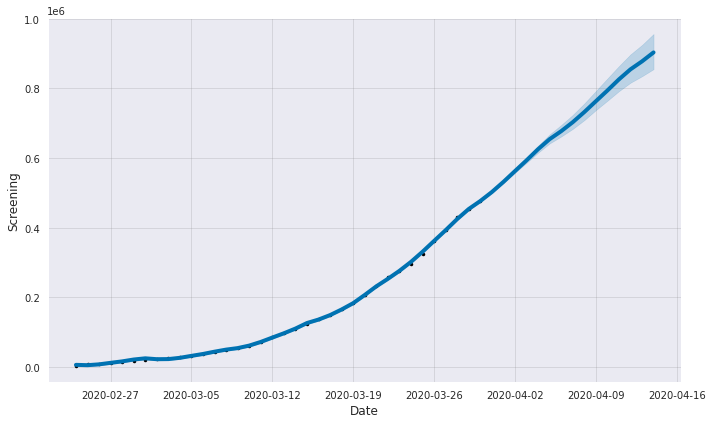

In [198]:
fig_test = plot_plotly(m, forecast_test)
py.iplot(fig_test) 
fig_test = m.plot(forecast_test,xlabel='Date',ylabel='Screening')

<h1> Foreacasting : We can still see that April 16th can expect a higher peak as compared to current ones. We can have better forecasting with more data as we go ahead and even do more predictions with more data</h1>